2.1.0
4423680/4422102 [==============================] - 0s 0us/step
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.4966 - accuracy: 0.8255
Epoch 2/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3767 - accuracy: 0.8640
Epoch 3/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3346 - accuracy: 0.8772
Epoch 4/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.3128 - accuracy: 0.8848
Epoch 5/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2957 - accuracy: 0.8908
Epoch 6/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.2803 - accuracy: 0.8978
Epoch 7/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2683 - accuracy: 0.8996
Epoch 8/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2582 - accuracy: 0.9031
Epoch 9/10
60000/60000 [============================

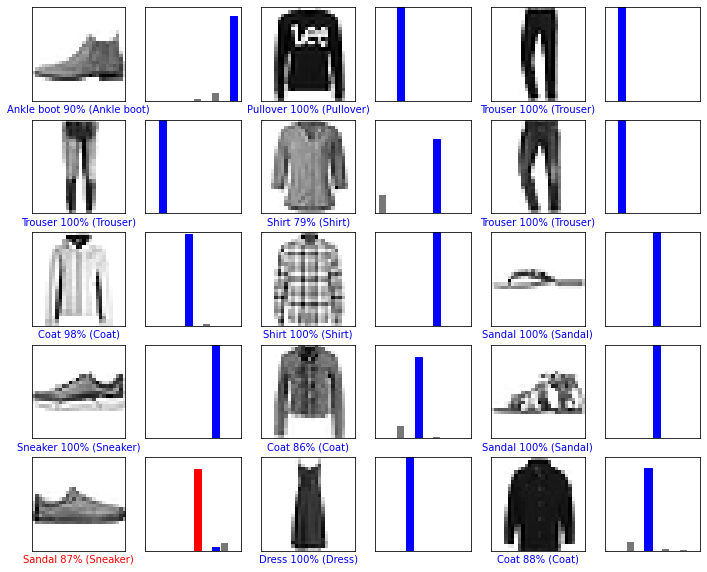

In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#normalize
train_images = train_images / 255.0

test_images = test_images / 255.0

model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation=tf.nn.relu),
keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)
#항상 valiiddata를 확인하면서 traine을 적절할때 끊어야한다

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()